In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [4]:
df = pd.read_csv(url,header = 0)

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Single Linear Regression


In [8]:
lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df['Price']

In [9]:
lm.fit(X,Y)

LinearRegression()

In [10]:
lm.coef_

array([1485.19362648])

In [11]:
lm.intercept_

253.6611706858214

In [13]:
Yhat = lm.predict(X)
Yhat

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057, 1073.07834392, 1073.07834392, 1073.07834392,
       1534.00050386, 1175.50549057, 1175.50549057, 1277.93263722,
       1277.93263722, 1073.07834392, 1073.07834392, 1534.00050386,
       1175.50549057, 1175.50549057, 1073.07834392, 1073.07834392,
       1175.50549057, 1534.00050386, 1175.50549057, 1534.00050386,
       1636.42765051, 1277.93263722, 1482.78693053, 1636.42765051,
       1636.42765051, 1534.00050386, 1636.42765051, 1636.42765051,
       1073.07834392, 1175.50549057, 1073.07834392, 1175.50549057,
       1636.42765051, 1175.50549057, 1534.00050386, 1073.07834392,
       1175.50549057, 1636.42765051, 1073.07834392, 1073.07834392,
       1073.07834392, 1687.64122384, 1073.07834392, 1534.00050386,
       1073.07834392, 1073.07834392,  868.22405061, 1175.50549057,
       1175.50549057, 1175.50549057, 1175.50549057, 1073.07834392,
       1073.07834392, 1534.00050386, 1636.42765051, 1534.00050

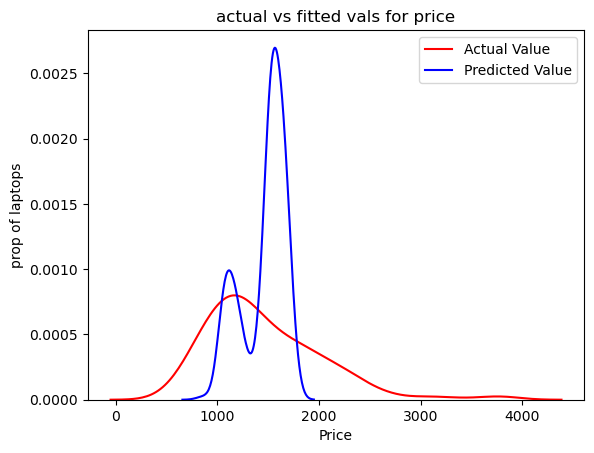

In [17]:
ax1 = sns.distplot(df['Price'] ,hist = False, color = 'r',label = 'actual_data')
sns.distplot(Yhat,hist=False,color='b',label='fitted_value',ax=ax1)
plt.title("actual vs fitted vals for price")
plt.xlabel('Price')
plt.ylabel('prop of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()


In [18]:
mean_squared_error(df['Price'],Yhat)

284583.4405868629

In [20]:
r2_score = lm.score(X,Y)
r2_score

0.1344436321024326

# Multiple Linear Regression


In [21]:
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']]

In [23]:
lm2 = LinearRegression()
lm2.fit(Z,df['Price'])

LinearRegression()

In [25]:
Y_hat = lm2.predict(Z)
Y_hat

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022, 1056.42067418, 1252.02084839,  806.98504446,
       1007.51446753, 1449.64309091, 1254.0429167 ,  757.73972448,
        380.80382381, 1345.51622771, 1154.22076129, 1452.55027146,
       1445.33838312, 1254.0429167 , 1345.51622771, 1154.22076129,
       1640.93855733, 1452.55027146, 1543.13847022, 1167.75942573,
       1841.4679804 ,  283.00373671, 1212.25798099, 1552.37242687,
       1939.2680675 , 1376.73250015, 1939.2680675 , 1650.17251398,
       1345.51622771, 1449.64309091, 1154.22076129, 1543.13847022,
       1138.08329264, 1351.8430038 , 1105.31455464, 1056.42067418,
       1543.13847022, 1362.90546776,  882.80281577,  904.78513157,
       1056.42067418, 2093.00082524, 1252.02084839, 1643.84573788,
       1252.02084839, 1345.51622771, 1212.9253343 , 1449.64309091,
       1543.13847022, 1445.33838312, 1449.64309091, 1345.51622771,
        628.97535593, 1775.17253369, 1747.97260108, 1550.35035

Text(0, 0.5, 'proportion')

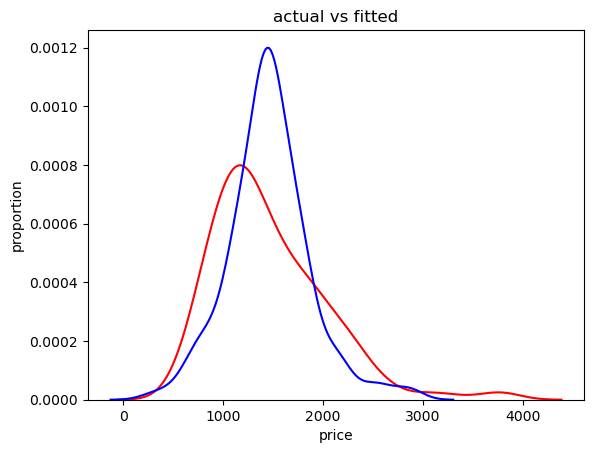

In [29]:
ax2 = sns.distplot(df['Price'],hist=False,color = 'r',label = 'actual_value')
sns.distplot(Y_hat,hist=False,color = 'b',label='fitted vals',ax=ax2)
plt.title('actual vs fitted')
plt.xlabel('price')
plt.ylabel('proportion')

In [31]:
MSE = mean_squared_error(df['Price'],Y_hat)
MSE

161680.57263893104

In [33]:
r2 = lm.score(X,Y)
r2

0.1344436321024326

# Polynomial Regression


In [34]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [35]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

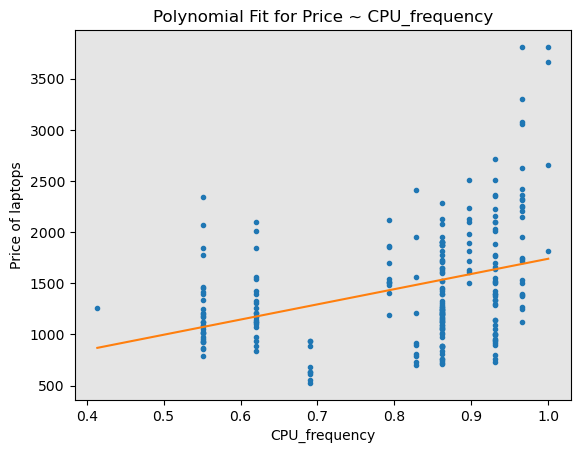

In [36]:
PlotPolly(p1, X, Y, 'CPU_frequency')

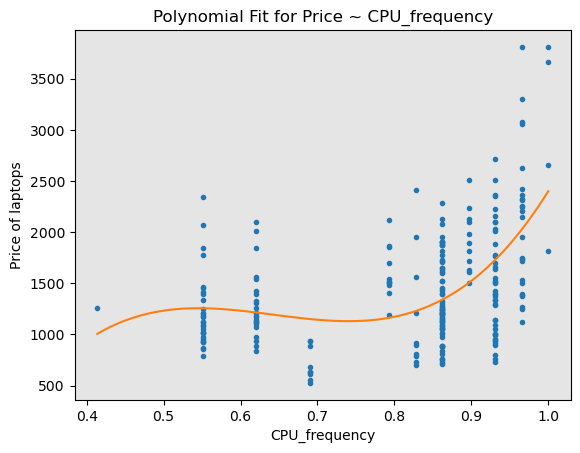

In [37]:
PlotPolly(p3, X, Y, 'CPU_frequency')

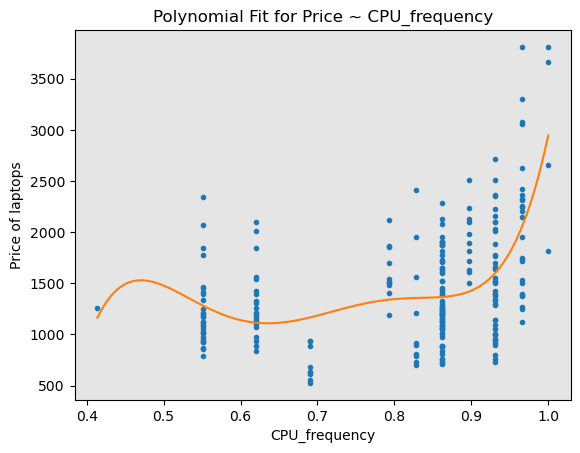

In [38]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [39]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

TypeError: 'numpy.float64' object is not callable